In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
mt5.initialize()
ativo ='WDO$N'
data = pd.DataFrame(mt5.copy_rates_from_pos(ativo, mt5.TIMEFRAME_D1, 1, 5))
data['Data'] = pd.to_datetime(data['time'],unit='s')
dataS = pd.DataFrame(mt5.copy_rates_from_pos(ativo, mt5.TIMEFRAME_W1, 1, 8))
dataM = pd.DataFrame(mt5.copy_rates_from_pos(ativo, mt5.TIMEFRAME_MN1, 1, 6))
#poc = pd.read_excel('poc_dia_dolpro.xlsx')


# AMPLITUDE DIÁRIA

In [5]:
data["Amplitude%"]=(data["high"]-data["low"])*100/data["low"]

data["Amplitude"]=data["high"]-data["low"]

data["Aber->Máx"]=(data["high"]-data["open"])*100/data["open"]

data["Aber->Min"]=(data["open"]-data["low"])*100/data["open"]

data["Máx->Fec"]=(data["high"]-data["close"])*100/data["close"]

data["Min->Fec"]=(data["close"]-data["low"])*100/data["low"]

data["Fec[d-1]->Max"] = abs(((data["high"]-data["close"].shift(1))*100/data["close"].shift(1)))

data["Fec[d-1]->Min"] = abs(((data["low"]-data["close"].shift(1))*100/data["close"].shift(1)))

# data['Media_amplitude'] = data["Amplitude%"].rolling(window = 5, closed='left').mean()

data[["Amplitude","Amplitude%","Aber->Min","Máx->Fec","Min->Fec",
      "Fec[d-1]->Min","Fec[d-1]->Max"]].describe()

,Amplitude,Amplitude%,Aber->Min,Máx->Fec,Min->Fec,Fec[d-1]->Min,Fec[d-1]->Max
count,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000
mean,36.800000,0.748542,0.285877,0.285502,0.462003,0.364700,0.415494
std,14.109394,0.286484,0.169328,0.249503,0.299994,0.118395,0.356376
min,18.000000,0.366935,0.081475,0.071138,0.183243,0.243902,0.060969
25%,30.000000,0.610687,0.192113,0.111404,0.295587,0.289611,0.159561
50%,35.000000,0.712613,0.233764,0.131181,0.374835,0.349194,0.378755
75%,47.500000,0.962415,0.455927,0.528402,0.498728,0.424283,0.634688
max,53.500000,1.090057,0.466106,0.585386,0.957620,0.516508,0.843496


In [3]:
#Calcula os quartis para os 85%
quartil_85 = data[["Amplitude%","Aber->Máx","Aber->Min","Máx->Fec","Min->Fec","Fec[d-1]->Min",
                   "Fec[d-1]->Max"]].quantile(q=0.85)

print(quartil_85)

Amplitude%       1.110023
Aber->Máx        0.951773
Aber->Min        0.780509
Máx->Fec         0.644614
Min->Fec         0.802463
Fec[d-1]->Min    0.763126
Fec[d-1]->Max    0.905576
Name: 0.85, dtype: float64


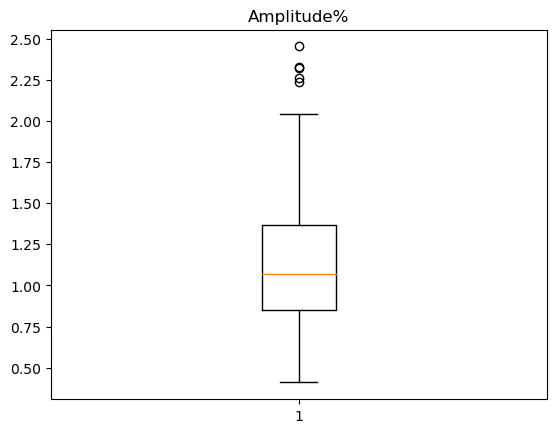

In [20]:
plt.boxplot(data['Amplitude%'])
plt.title('Amplitude%')
plt.show()

(array([ 4.,  4., 24., 21., 29., 35., 27., 26., 17., 13., 14.,  6., 10.,
         5.,  5.,  6.,  1.,  2.,  1.,  2.]),
 array([ 20.   ,  25.225,  30.45 ,  35.675,  40.9  ,  46.125,  51.35 ,
         56.575,  61.8  ,  67.025,  72.25 ,  77.475,  82.7  ,  87.925,
         93.15 ,  98.375, 103.6  , 108.825, 114.05 , 119.275, 124.5  ]),
 <BarContainer object of 20 artists>)

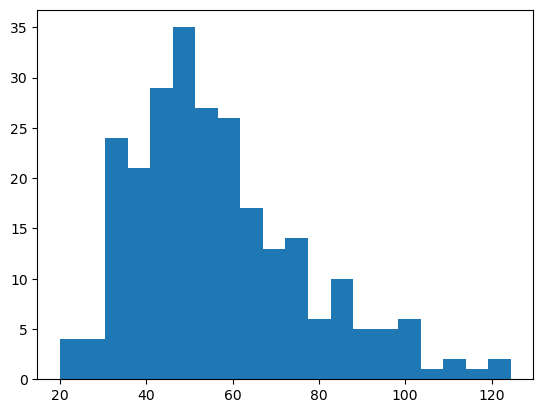

In [21]:
plt.hist(data['Amplitude'],bins=20)

# AMPLITUDE SEMANAL

In [3]:
dataS["Amplitude%"]=(dataS["high"]-dataS["low"])*100/dataS["low"]

dataS["Amplitude"]=dataS["high"]-dataS["low"]

dataS["Aber->Máx"]=(dataS["high"]-dataS["open"])*100/dataS["open"]

dataS["Aber->Min"]=(dataS["open"]-dataS["low"])*100/dataS["open"]

dataS["Máx->Fec"]=(dataS["high"]-dataS["close"])*100/dataS["close"]

dataS["Min->Fec"]=(dataS["close"]-dataS["low"])*100/dataS["low"]

dataS["Fec[d-1]->Max"] = abs(((dataS["high"]-dataS["close"].shift(1))*100/dataS["close"].shift(1)))

dataS["Fec[d-1]->Min"] = abs(((dataS["low"]-dataS["close"].shift(1))*100/dataS["close"].shift(1)))


dataS[["Amplitude%","Aber->Máx","Aber->Min","Máx->Fec","Min->Fec",
      "Fec[d-1]->Min","Fec[d-1]->Max"]].describe()

,Amplitude%,Aber->Máx,Aber->Min,Máx->Fec,Min->Fec,Fec[d-1]->Min,Fec[d-1]->Max
count,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000
mean,1.903055,0.893232,0.990610,1.063662,0.832240,0.887557,1.044080
std,0.207829,0.459346,0.492223,0.510336,0.413396,0.657710,0.594976
min,1.578133,0.273307,0.346444,0.441705,0.237285,0.030817,0.263158
25%,1.788409,0.569361,0.757682,0.747482,0.491248,0.459276,0.666710
50%,1.893476,0.812334,1.046836,1.016319,0.856137,0.981595,0.870798
75%,2.066692,1.254216,1.132317,1.361647,1.109323,1.194611,1.485820
max,2.197462,1.525389,1.882782,1.955537,1.437949,1.892713,1.869543


# AMPLITUDE MENSAL

In [6]:
dataM["Amplitude%"]=(dataM["high"]-dataM["low"])*100/dataM["low"]

dataM["Amplitude"]=dataM["high"]-dataM["low"]

dataM["Aber->Máx"]=(dataM["high"]-dataM["open"])*100/dataM["open"]

dataM["Aber->Min"]=(dataM["open"]-dataM["low"])*100/dataM["open"]

dataM["Máx->Fec"]=(dataM["high"]-dataM["close"])*100/dataM["close"]

dataM["Min->Fec"]=(dataM["close"]-dataM["low"])*100/dataM["low"]

dataM["Fec[d-1]->Max"] = abs(((dataM["high"]-dataM["close"].shift(1))*100/dataM["close"].shift(1)))

dataM["Fec[d-1]->Min"] = abs(((dataM["low"]-dataM["close"].shift(1))*100/dataM["close"].shift(1)))


dataM[["Amplitude%","Aber->Máx","Aber->Min","Máx->Fec","Min->Fec",
      "Fec[d-1]->Min","Fec[d-1]->Max"]].describe()

,Amplitude%,Aber->Máx,Aber->Min,Máx->Fec,Min->Fec,Fec[d-1]->Min,Fec[d-1]->Max
count,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000
mean,5.582211,2.362563,3.042388,3.301486,2.233773,2.966555,2.473675
std,0.853101,1.836323,2.005692,2.108297,1.643065,2.362472,2.195716
min,4.436512,0.374975,0.000000,0.804101,0.345168,0.042079,0.059020
25%,5.258569,1.072183,2.544492,1.595461,1.201921,2.282695,0.638821
50%,5.480186,2.181287,3.018835,3.356270,1.773038,2.369570,2.791069
75%,5.790792,3.003771,3.472300,5.014831,3.355997,3.636364,3.377676
max,7.017359,5.457413,6.206828,5.716067,4.616193,6.502066,5.501788


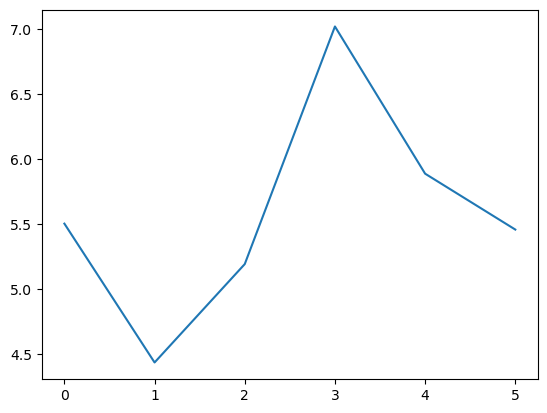

In [38]:
plt.plot(dataM['Amplitude%'])

<h1>Amplitude em relação a POC</h1>

In [7]:
mesclagem = data.merge(poc,on='Data')

In [11]:
mesclagem['POC_max'] = abs((mesclagem['POC'].shift(1) - mesclagem['high'])*100/mesclagem['POC'].shift(1))
mesclagem['POC_min'] = abs((mesclagem['POC'].shift(1) - mesclagem['low'])*100/mesclagem['POC'].shift(1))
mesclagem[['POC_max','POC_min']].describe()

,POC_max,POC_min
count,21.000000,21.000000
mean,0.733342,0.553773
std,0.577544,0.496816
min,0.122850,0.000000
25%,0.342604,0.261727
50%,0.545604,0.510893
75%,0.963948,0.683168
max,1.913641,2.258687


In [7]:
troute = TemplateRoute(page.route)

if troute.match("/books/:id"):
    print("Book view ID:", troute.id)
elif troute.match("/account/:account_id/orders/:order_id"):
    print("Account:", troute.account_id, "Order:", troute.order_id)
else:
    print("Unknown route")

NameError: name 'TemplateRoute' is not defined

In [82]:
import fundamentus as ft
import pandas as pd
import yfinance as yf
ativo = yf.Ticker('MXN=X')
historico = ativo.history(period='1mo')
historico

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-22 00:00:00+00:00,17.031269,17.048820,16.918900,17.031269,0,0.0,0.0
2023-12-25 00:00:00+00:00,16.978371,16.996201,16.971470,16.978371,0,0.0,0.0
2023-12-26 00:00:00+00:00,16.975201,16.995880,16.933300,16.975201,0,0.0,0.0
2023-12-27 00:00:00+00:00,16.973600,16.994591,16.893900,16.973600,0,0.0,0.0
2023-12-28 00:00:00+00:00,16.913601,16.930040,16.847000,16.913601,0,0.0,0.0
2023-12-29 00:00:00+00:00,16.951200,16.987850,16.880699,16.951200,0,0.0,0.0
2024-01-01 00:00:00+00:00,16.963440,16.963440,16.963341,16.963440,0,0.0,0.0
2024-01-02 00:00:00+00:00,16.962509,17.064510,16.895300,16.962509,0,0.0,0.0
2024-01-03 00:00:00+00:00,17.019400,17.098249,17.003599,17.019400,0,0.0,0.0


In [69]:
v = ft.get_setor_id('SLCE3')
v

KeyError: 'SLCE3'